<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Player_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/understat_metadata_big5_1415_2021_latest.csv.txt?raw=true

--2021-03-30 05:03:04--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/understat_metadata_big5_1415_2021_latest.csv.txt?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/understat_metadata_big5_1415_2021_latest.csv.txt [following]
--2021-03-30 05:03:04--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/understat_metadata_big5_1415_2021_latest.csv.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/understat_metadata_big5_1415_2021_latest.csv.txt [following]
--2021-03-30 05:03:05--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/understat_m

In [142]:
data=pd.read_csv("/content/understat_metadata_big5_1415_2021_latest.csv.txt?raw=true")

In [143]:
data_19=data[data["year"]==2019]

In [144]:
data_19

,player_id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_name,npg,npxG,xGChain,xGBuildup,year
2499,675,Jack Grealish,36,3235,8,6.844704,6,7.637995,73,92,8,0,F M,Aston Villa,8,6.083535,18.373642,9.304537,2019
2500,7722,Trézéguet,34,1955,6,5.345049,1,0.958256,50,21,2,1,F M S,Aston Villa,6,5.345049,6.641215,2.611431,2019
2501,7724,Wesley,21,1806,5,7.270558,1,0.883616,36,11,3,0,F,Aston Villa,5,6.509389,8.007936,2.674765,2019
2502,5612,Anwar El Ghazi,34,2082,4,6.381360,4,2.877202,53,30,3,0,F M S,Aston Villa,3,5.620191,8.016559,2.210284,2019
2503,6122,Douglas Luiz,36,2602,3,2.277795,2,2.004115,38,17,8,0,M S,Aston Villa,3,2.277795,5.569815,3.396518,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,7882,Sheraldo Becker,13,534,0,0.226366,2,0.938184,6,8,1,0,M S,Union Berlin,0,0.226366,1.335867,0.696946,2019
5227,7884,Ken Reichel,7,536,0,0.219972,0,0.624844,5,2,0,0,D M S,Union Berlin,0,0.219972,1.127549,0.751512,2019
5228,7885,Joshua Mees,15,294,0,0.420813,1,0.274710,9,4,1,0,M S,Union Berlin,0,0.420813,0.750796,0.284732,2019
5229,7995,Akaki Gogia,3,116,0,0.018414,0,0.308683,1,4,0,0,F S,Union Berlin,0,0.018414,0.308683,0.000000,2019


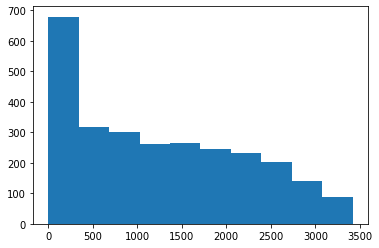

In [145]:
plt.hist(data_19["time"])
plt.show()

We atleast want the player to be involved in 2000 minutes of football action or else the sample to too small to analyze a player

In [146]:
data_19=data_19.loc[data_19["time"]>=2000]

In [147]:
data_19.drop(["year","player_id"],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
data_19

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_name,npg,npxG,xGChain,xGBuildup
2499,Jack Grealish,36,3235,8,6.844704,6,7.637995,73,92,8,0,F M,Aston Villa,8,6.083535,18.373642,9.304537
2502,Anwar El Ghazi,34,2082,4,6.381360,4,2.877202,53,30,3,0,F M S,Aston Villa,3,5.620191,8.016559,2.210284
2503,Douglas Luiz,36,2602,3,2.277795,2,2.004115,38,17,8,0,M S,Aston Villa,3,2.277795,5.569815,3.396518
2505,John McGinn,28,2323,3,3.982573,3,2.617759,55,37,3,0,M S,Aston Villa,3,3.982573,9.970861,5.289585
2506,Tyrone Mings,33,2902,2,0.916616,2,0.571325,8,7,7,0,D,Aston Villa,2,0.916616,5.111491,5.068005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,Marvin Friedrich,31,2790,2,1.881706,0,0.049277,28,2,9,1,D,Union Berlin,2,1.881706,2.461386,2.416710
5213,Robert Andrich,30,2588,1,2.304951,2,1.877011,49,32,11,1,M,Union Berlin,1,2.304951,8.147461,4.797937
5220,Rafal Gikiewicz,33,2970,0,0.833815,0,0.165857,2,2,0,0,GK,Union Berlin,0,0.833815,2.588851,2.422993
5224,Christopher Trimmel,32,2864,0,0.086368,8,7.395264,5,67,6,0,D M,Union Berlin,0,0.086368,4.503684,3.418534


In [149]:
pd.unique(data["position"])

array(['F', 'F M', 'M S', 'F M S', 'M', 'D', 'D S', 'S', 'GK', 'F S',
       'D F M S', 'D M S', 'D M', 'GK S', 'D F S', 'D F', 'D F M'],
      dtype=object)

In [150]:
from sklearn.preprocessing import OneHotEncoder
X=pd.DataFrame(data_19["position"])
enc = OneHotEncoder()
enc.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [151]:
enc.transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [152]:
enc.categories_

[array(['D', 'D F M S', 'D M', 'D M S', 'D S', 'F', 'F M', 'F M S', 'F S',
        'GK', 'GK S', 'M', 'M S'], dtype=object)]

In [153]:
data_19[enc.categories_[0]]=enc.transform(X).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [154]:
data_19=data_19.set_index("player_name")

In [155]:
data_19.drop(["position","games"],inplace=True,axis=1)

In [156]:
for i in ["goals","xG","assists","xA","shots","key_passes","yellow_cards","red_cards","npg","npxG","xGChain","xGBuildup"]:
  data_19[i]=data_19[i]/data_19["time"]

In [157]:
data_19.drop(["time"],axis=1,inplace=True)

In [158]:
x=data_19.drop(["team_name"],axis=1)

In [165]:
max=np.array(x.describe().loc["max"])
j=0
for i in x.columns:
  x[i]=x[i]/max[j]
  j=j+1

In [166]:
x

,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup,D,D F M S,D M,D M S,D S,F,F M,F M S,F S,GK,GK S,M,M S
player_name,,,,,,,,,,,,,,,,,,,,,,,,,
Jack Grealish,0.200964,0.187392,0.209397,0.322658,0.316788,0.602564,0.336176,0.000000,0.235613,0.187738,0.352746,0.289785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Anwar El Ghazi,0.156128,0.271459,0.216907,0.188854,0.357367,0.305302,0.195881,0.000000,0.137285,0.269488,0.239138,0.106960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Douglas Luiz,0.093695,0.077532,0.086779,0.105257,0.205020,0.138430,0.417959,0.000000,0.109849,0.087393,0.132946,0.131517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
John McGinn,0.104948,0.151840,0.145803,0.153999,0.332379,0.337475,0.175559,0.000000,0.123042,0.171153,0.266578,0.229418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tyrone Mings,0.056006,0.027974,0.077808,0.026904,0.038700,0.051108,0.327908,0.000000,0.065662,0.031533,0.109394,0.175953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marvin Friedrich,0.058254,0.059734,0.000000,0.002414,0.140888,0.015189,0.438520,0.373656,0.068298,0.067331,0.054792,0.087272,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Robert Andrich,0.031401,0.078880,0.087249,0.099115,0.265798,0.261984,0.577803,0.402821,0.036814,0.088913,0.195524,0.186787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Rafal Gikiewicz,0.000000,0.024865,0.000000,0.007632,0.009454,0.014268,0.000000,0.000000,0.000000,0.028027,0.054137,0.082196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [167]:
x1=x.transpose()

In [170]:
corr_matrix=x1.corr(method="pearson")

In [176]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=0).fit(corr_matrix)

In [187]:
for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i]==0:
    #print(x.iloc[i])
    pass

In [188]:
len(kmeans.labels_)

704

In [190]:
kmeans.cluster_centers_[0].

array([ 1.74489754e-01,  9.18552288e-01,  2.96504241e-03,  9.65792633e-02,
       -6.42931989e-02,  3.26318958e-03, -4.99745118e-02, -4.40915053e-02,
        1.70140565e-01,  1.60807190e-01,  8.88295135e-02, -5.32499776e-02,
       -1.70935012e-02, -1.94140081e-02, -1.22973264e-01, -3.18296556e-02,
        5.07349878e-02,  1.03285489e-01,  9.06467114e-01, -3.69716927e-02,
       -1.10671980e-01,  8.87100639e-01, -4.57436684e-02, -6.24619847e-03,
       -4.54737172e-02, -1.89422370e-02, -1.26868390e-01,  8.15707281e-01,
        9.37852463e-02,  9.65904873e-02, -3.99225172e-02, -9.49273155e-02,
       -8.39072237e-02,  3.51946999e-02, -1.19362646e-01,  2.00166126e-01,
        9.18106859e-01,  8.98236093e-01,  1.75590717e-01,  4.32088244e-02,
        2.99893387e-02,  1.12409691e-01, -2.89008040e-03, -6.25205443e-02,
       -9.86947384e-02, -1.16367138e-01,  7.96198568e-02,  9.02467308e-01,
        1.01574523e-02,  6.40938549e-03, -5.71916674e-02, -1.02359292e-01,
       -1.15263350e-02, -